In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\Users\apkin\OneDrive\Desktop\Financial Analytics\Bankruptcy_data.xlsx")

In [4]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [5]:
df.shape

(92872, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


### EDA

In [7]:
null_pattern = df[['Assets Growth', 'Employee Growth', 'Sales Growth']].isnull().all(axis=1)
df[null_pattern]

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
39,-2.640000,0.000000,0.100000,-0.030000,1.700000,1.170000,-0.020000,-0.290000,10.660000,NaN,NaN,NaN,0
75,0.250000,0.430000,0.250000,0.190000,0.500000,1.670000,0.120000,0.170000,0.580000,NaN,NaN,NaN,0
112,1.720000,0.530000,0.150000,0.110000,1.010000,0.880000,0.120000,0.060000,9.850000,NaN,NaN,NaN,0
145,4.360000,0.000000,0.110000,0.100000,0.960000,0.220000,0.450000,0.160000,79.880000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92845,-0.626510,0.338776,-0.427102,-0.187205,0.230874,0.000000,NaN,-0.061543,465.209574,NaN,NaN,NaN,0
92848,-1.004978,-0.008890,-0.102731,-0.096387,0.196248,0.094045,-1.024904,-0.123008,39.856877,NaN,NaN,NaN,0
92852,5.988079,0.018802,0.234296,0.075497,1.058632,0.433380,0.174205,0.606081,43.570500,NaN,NaN,NaN,0
92856,1.327284,0.127155,0.075476,0.135145,0.441655,0.344380,0.392431,0.072057,65.840824,NaN,NaN,NaN,0


In [8]:
null_df = df[['Assets Growth', 'Sales Growth', 'Employee Growth']].isnull()

null_correlation = null_df.all(axis=1)

shared_null_count = null_correlation.sum()
print(f'Number of rows where all three columns share null values: {shared_null_count}')

total_nulls = null_df.sum()
print(f'Total number of nulls in each column:\n{total_nulls}')

total_rows = df.shape[0]
shared_null_percentage = (shared_null_count / total_rows) * 100
print(f'Percentage of rows where all three columns share null values: {shared_null_percentage:.2f}%')

Number of rows where all three columns share null values: 6701
Total number of nulls in each column:
Assets Growth      6701
Sales Growth       6701
Employee Growth    7010
dtype: int64
Percentage of rows where all three columns share null values: 7.22%


Asset  Growth, Sales Growth, and Employee Growth. Notably, 6,701 rows have missing values in all 
three columns, suggesting potential data quality issues. However, this subset represents only 
7.22% of the data and was deemed a manageable proportion for the analysis.

In [9]:
df.duplicated().sum()

27

In [10]:
df[df.duplicated()]

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
31621,1.38,0.02,0.06,0.10,1.10,0.40,0.26,0.07,46.97,NaN,NaN,NaN,0
31939,4.13,-0.04,0.12,0.09,0.77,0.42,0.20,0.13,148.42,NaN,NaN,NaN,0
32929,5.03,0.07,0.22,0.15,0.72,0.58,0.25,0.13,44.66,NaN,NaN,NaN,0
35565,4.59,0.04,0.17,0.12,0.83,0.54,0.22,0.11,19.35,NaN,NaN,NaN,0
35566,4.57,0.04,0.18,0.12,0.79,0.51,0.24,0.09,22.82,0.020838,-0.033425,0.026115,0
35567,4.44,0.02,0.19,0.11,0.82,0.48,0.23,0.10,19.14,0.014645,-0.034895,0.008614,0
36008,3.57,0.02,0.16,0.13,0.91,0.39,0.33,0.13,274.43,NaN,NaN,NaN,0
51481,-3.02,-0.08,0.09,-0.04,1.03,0.97,-0.04,-0.14,9.86,NaN,NaN,NaN,0
51482,2.67,-0.07,0.10,0.11,0.90,0.76,0.14,0.10,12.19,-0.060779,-0.268154,-0.344557,0
51483,3.16,-0.04,0.11,0.10,0.77,0.71,0.14,0.12,11.92,0.018161,-0.053691,1.315766,0


Due to the absence of unique company identifiers, I opted to 
retain these duplicates as their number is small and no rows exhibited identical financial 
information across all features. Without a basis for identification, it is not certain that these 
values represented legitimate duplication and/or errors

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


* The interquartile range (IQR) for most variables is close to zero, except for the Market Book Ratio, indicating the presence of both normal and extreme outliers.

* a median close to zero for most features, coupled with a substantial difference from their respective means, suggests a heavily skewed distribution in the data.

* the target variable "BK" exhibits a very low mean value, reflecting a predominant number of nonbankruptcy cases. The higher frequency of class "0" (non-bankruptcy) skews the average downward, thereby increasing the weight of this class in the dataset

In [11]:
print(df['BK'].value_counts())

print(df.BK.value_counts(normalize=True).round(2)*100)

BK
0    92314
1      558
Name: count, dtype: int64
BK
0    99.0
1     1.0
Name: proportion, dtype: float64


<Axes: xlabel='BK', ylabel='count'>

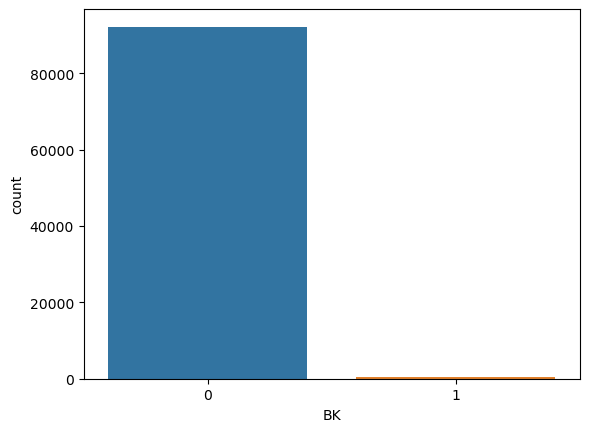

In [82]:
sns.countplot(x="BK", data = df)

In [19]:
df.isna().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [20]:
round(df.isna().mean()*100,2) #percentage of missing values

EPS                   0.01
Liquidity             0.27
Profitability         0.27
Productivity          0.27
Leverage Ratio        0.03
Asset Turnover        0.27
Operational Margin    5.98
Return on Equity      0.01
Market Book Ratio     0.06
Assets Growth         7.22
Sales Growth          7.22
Employee Growth       7.55
BK                    0.00
dtype: float64

#### Missing Values

For columns with a minimal number of missing values - specifically EPS, Return on Equity, Leverage Ratio, and Market Book Ratio, each with less than 0.10% missing data - removing the corresponding rows should not significantly impact data quality. 

For columns with more missing values, median imputation will be applied

In [21]:
df = df[(df['EPS'].isna()==False)&(df['Return on Equity'].isna()==False)&
        (df['Leverage Ratio'].isna()==False)&(df['Market Book Ratio'].isna()==False)]

In [22]:
round(df.isna().mean()*100,2)

EPS                   0.00
Liquidity             0.25
Profitability         0.25
Productivity          0.25
Leverage Ratio        0.00
Asset Turnover        0.25
Operational Margin    5.96
Return on Equity      0.00
Market Book Ratio     0.00
Assets Growth         7.20
Sales Growth          7.20
Employee Growth       7.53
BK                    0.00
dtype: float64

In [23]:
df['Liquidity'] = df['Liquidity'].fillna(df['Liquidity'].median())
df['Profitability'] = df['Profitability'].fillna(df['Profitability'].median())
df['Productivity'] = df['Productivity'].fillna(df['Productivity'].median())
df['Asset Turnover'] = df['Asset Turnover'].fillna(df['Asset Turnover'].median())
df['Operational Margin'] = df['Operational Margin'].fillna(df['Operational Margin'].median())
df['Assets Growth'] = df['Assets Growth'].fillna(df['Assets Growth'].median())
df['Sales Growth'] = df['Sales Growth'].fillna(df['Sales Growth'].median())
df['Employee Growth'] = df['Employee Growth'].fillna(df['Employee Growth'].median())

In [24]:
round(df.isna().mean()*100,2)

EPS                   0.0
Liquidity             0.0
Profitability         0.0
Productivity          0.0
Leverage Ratio        0.0
Asset Turnover        0.0
Operational Margin    0.0
Return on Equity      0.0
Market Book Ratio     0.0
Assets Growth         0.0
Sales Growth          0.0
Employee Growth       0.0
BK                    0.0
dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92805 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92805 non-null  float64
 1   Liquidity           92805 non-null  float64
 2   Profitability       92805 non-null  float64
 3   Productivity        92805 non-null  float64
 4   Leverage Ratio      92805 non-null  float64
 5   Asset Turnover      92805 non-null  float64
 6   Operational Margin  92805 non-null  float64
 7   Return on Equity    92805 non-null  float64
 8   Market Book Ratio   92805 non-null  float64
 9   Assets Growth       92805 non-null  float64
 10  Sales Growth        92805 non-null  float64
 11  Employee Growth     92805 non-null  float64
 12  BK                  92805 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.9 MB


In [49]:
X_features = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']

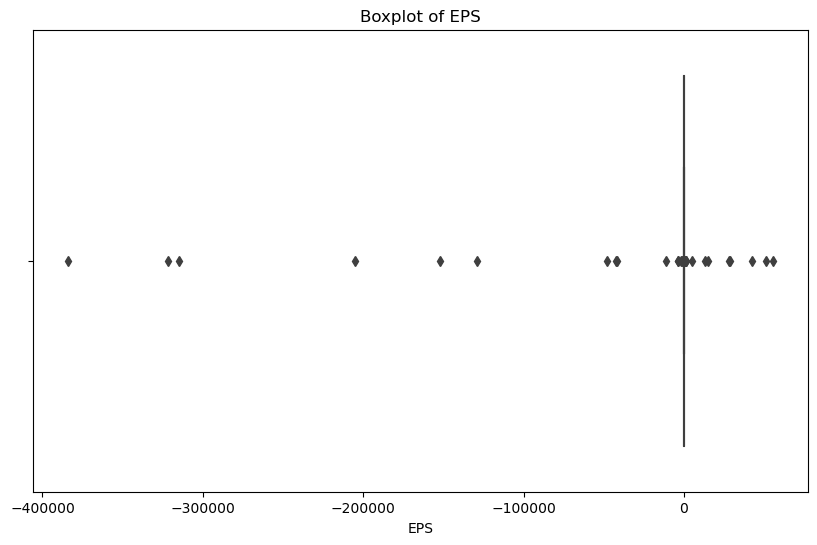

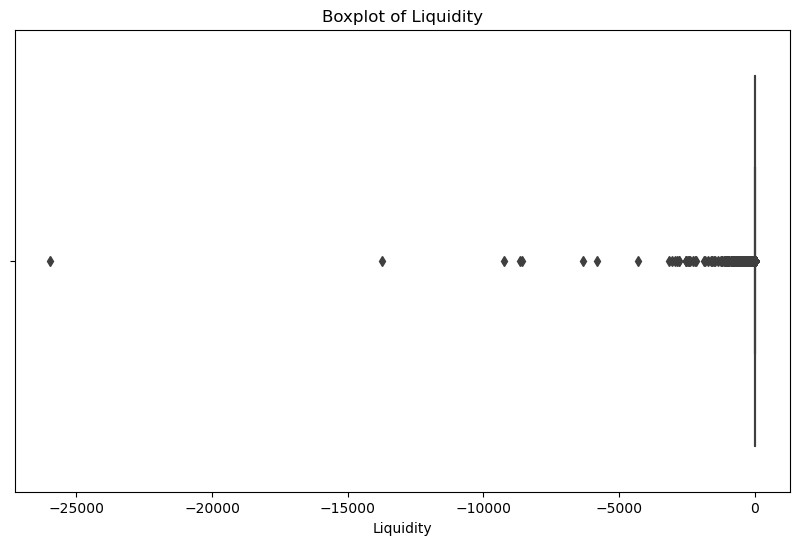

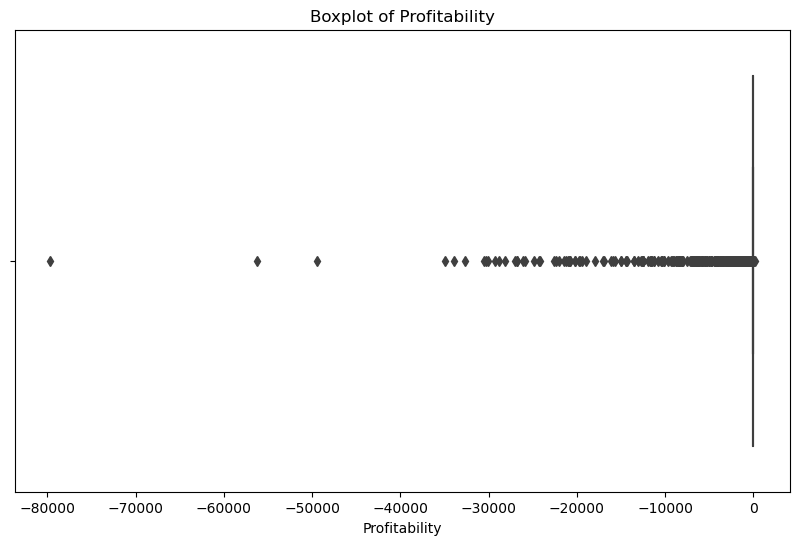

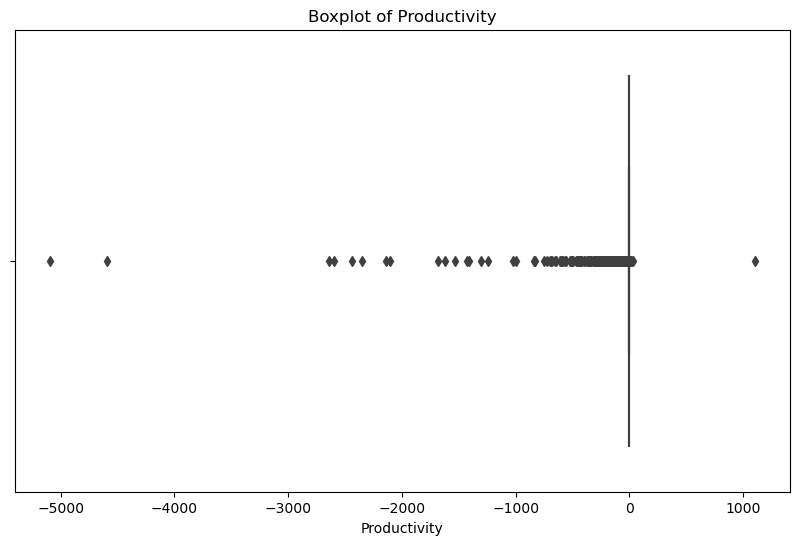

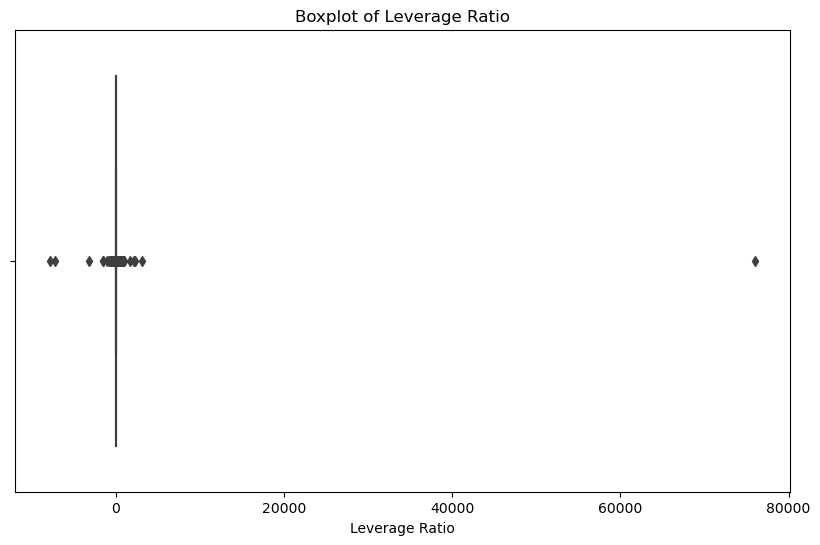

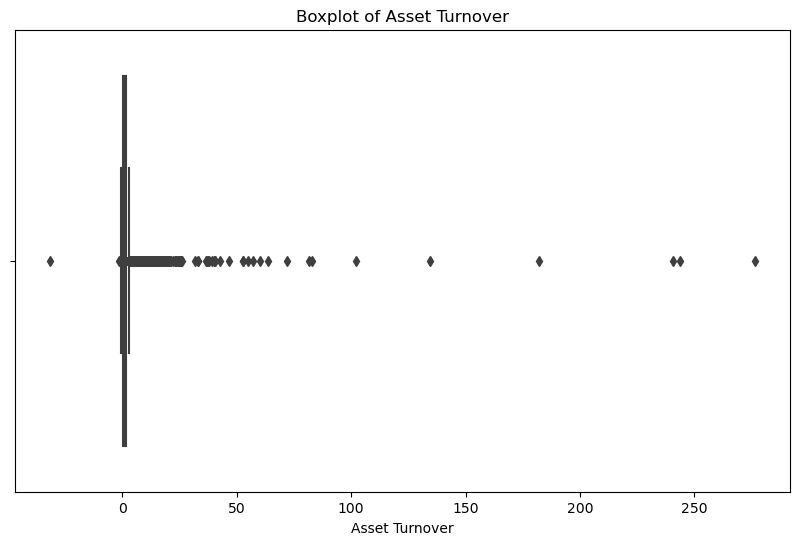

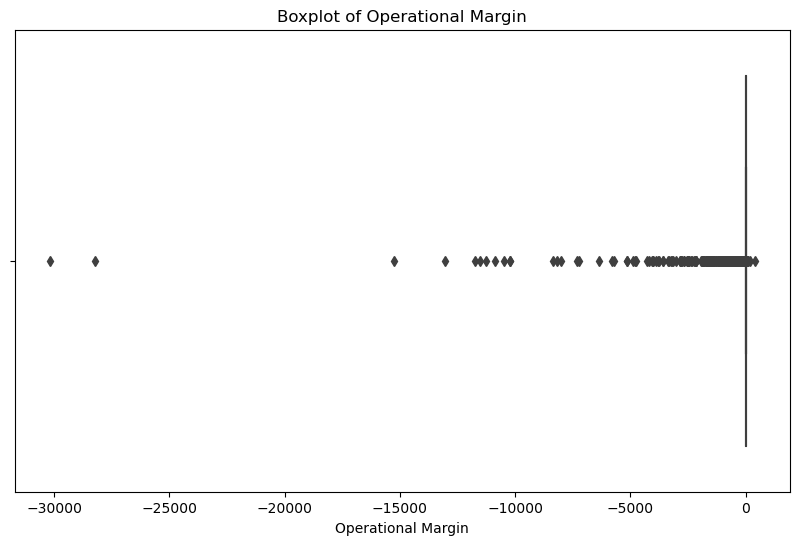

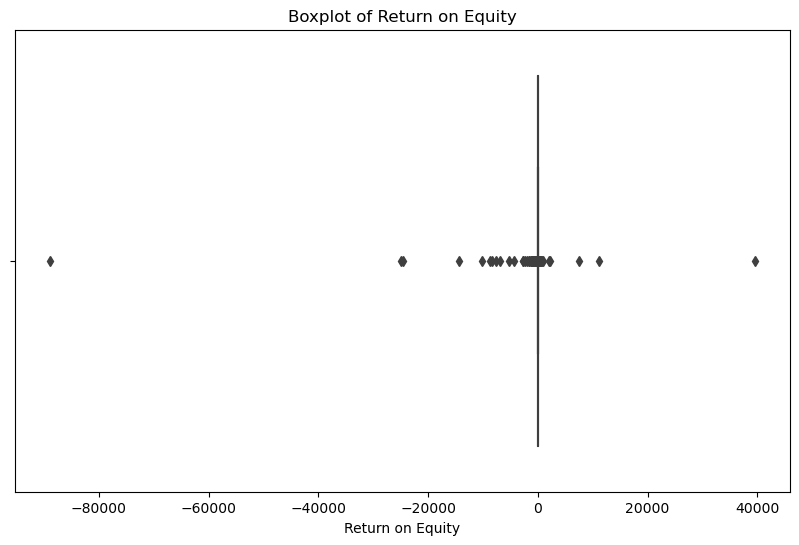

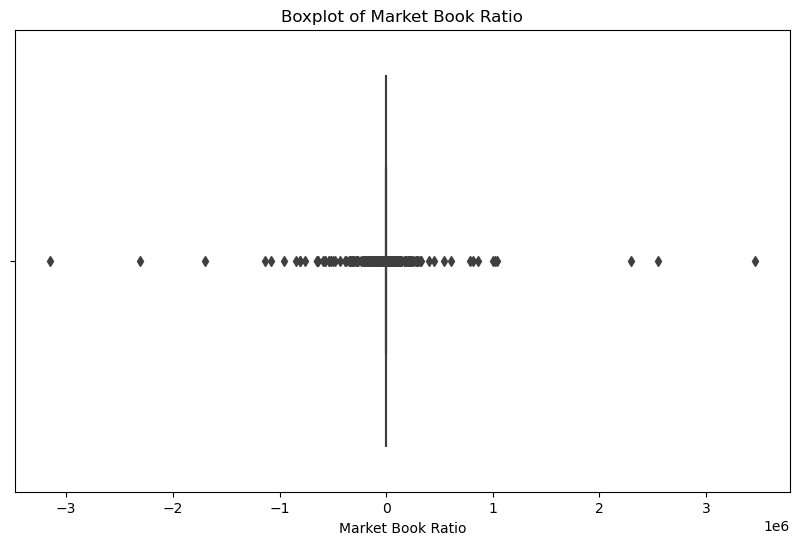

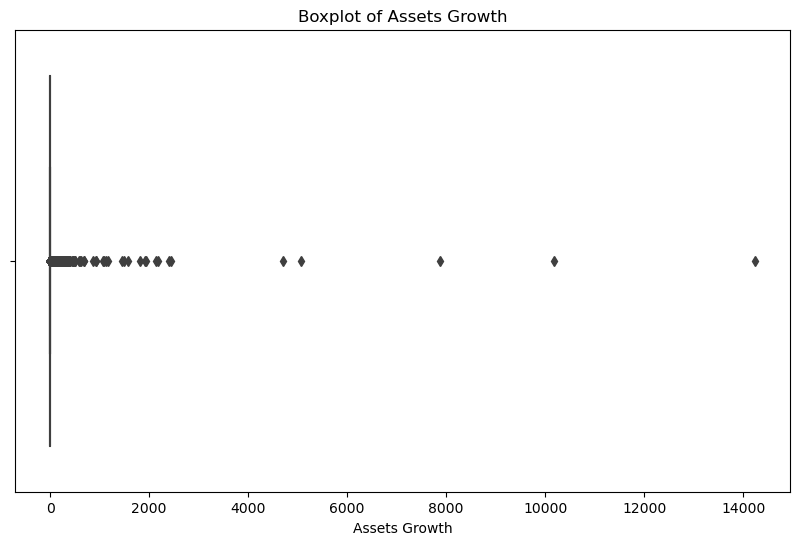

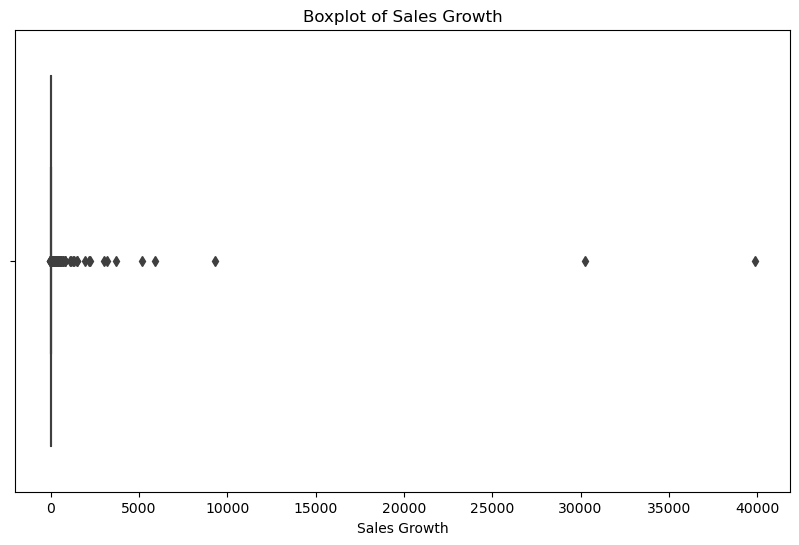

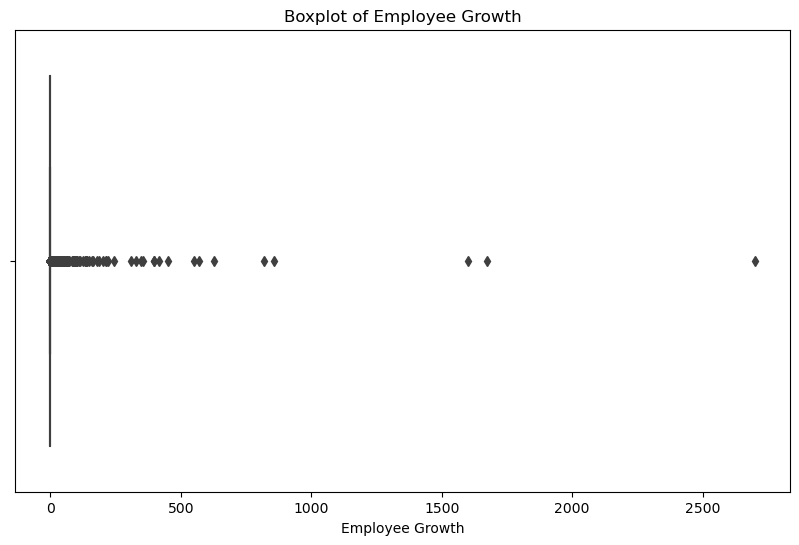

In [50]:
for col in X_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [51]:
df1 = df.copy()

def remove_outliers(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df[~outliers]

for col in X_features:
    df1 = remove_outliers(col, df1)

original_row_count = df.shape[0]
new_row_count = df1.shape[0]

In [52]:
print(original_row_count)

print(new_row_count)

92805
27810


#### Outliers

Utilizing traditional outlier removal methods such as the 1.5IQR rule proved impractical due to the narrow interquartile ranges (IQRs) observed in many variables, potentially leading to the exclusion of a significant portion of our data. I have confirmed that over 50% of our data would be removed if outliers were eliminated outliers using these methods.

It is important to note that removing 
outliers could also hinder model performance due to the state of imbalanced data. The imbalance 
could become worse if more observations are removed and our model will have a harder time 
predicting bankrupt companies.

In [53]:
X_cols = df[['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']] #not including Target - BK

In [54]:
from scipy.stats import skew, kurtosis

def skew_kurt(df):
    skewn = df.apply(lambda x: skew(x.dropna()))
    kurt = df.apply(lambda x: kurtosis(x.dropna()))
    return pd.DataFrame({'Skew': skewn, 'Kurtosis': kurt})

skewKurt_df = skew_kurt(X_cols)

In [55]:
skewKurt_df

,Skew,Kurtosis
EPS,-137.644624,20802.438547
Liquidity,-138.396528,25328.622590
Profitability,-50.667602,3739.343180
Productivity,-82.692732,9254.870031
Leverage Ratio,290.865226,87489.062472
Asset Turnover,70.980742,7700.668384
Operational Margin,-83.586069,9644.395507
Return on Equity,-166.163319,45851.745682
Market Book Ratio,11.320298,8385.395122
Assets Growth,142.387664,24000.894424


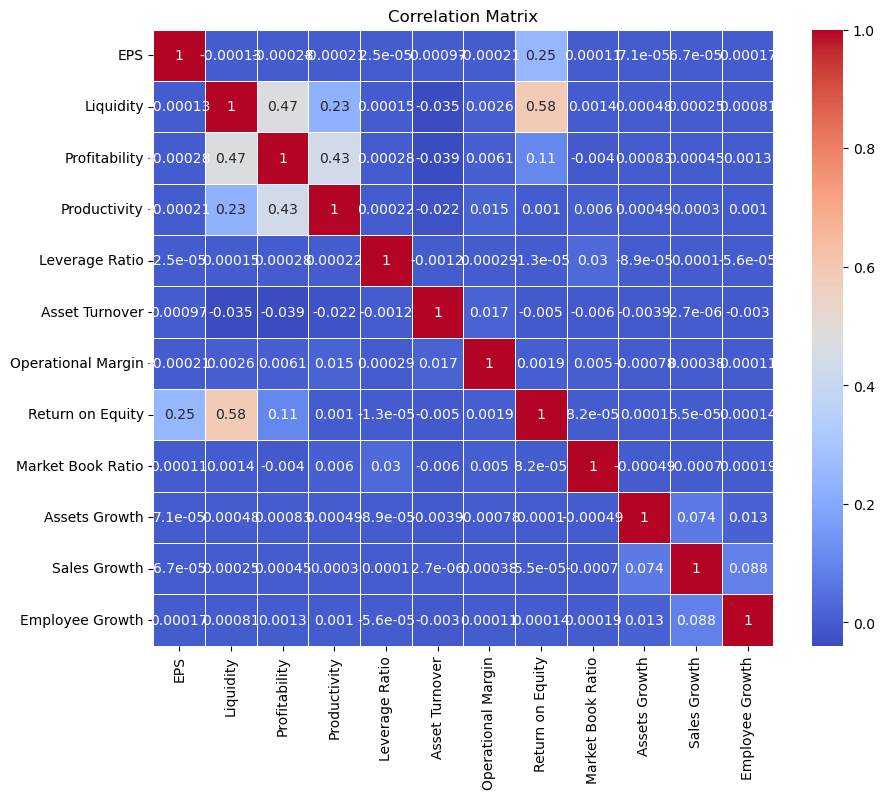

In [56]:
corr_matrix = X_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [57]:
Corr_Var = df[['EPS', 'Liquidity','Profitability', 'Productivity','Return on Equity']] #highly correlated variables

In [58]:
Corr_Var.head()

,EPS,Liquidity,Profitability,Productivity,Return on Equity
0,1.58,0.36,0.18,0.13,0.15
1,1.41,0.36,0.19,0.12,0.13
2,0.31,0.32,0.13,0.08,0.04
3,0.71,0.28,0.14,0.08,0.05
4,0.75,0.41,0.13,0.08,0.04


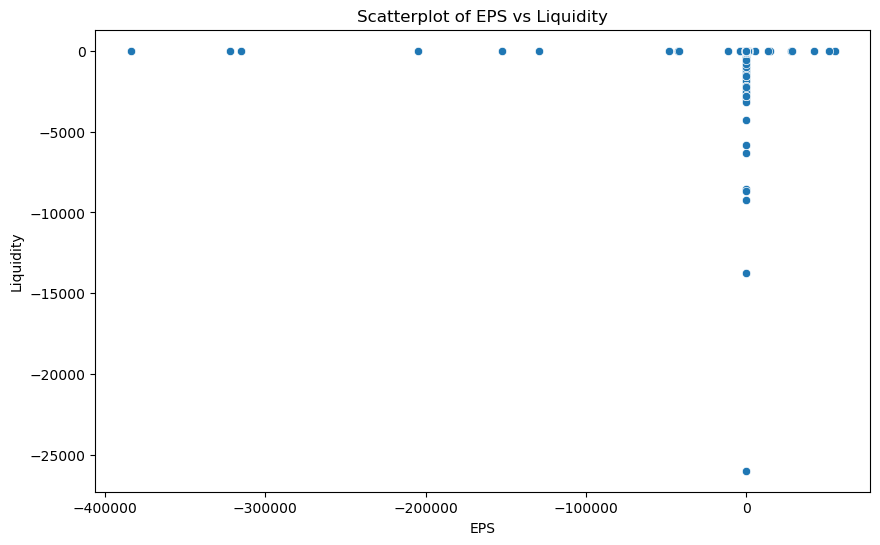

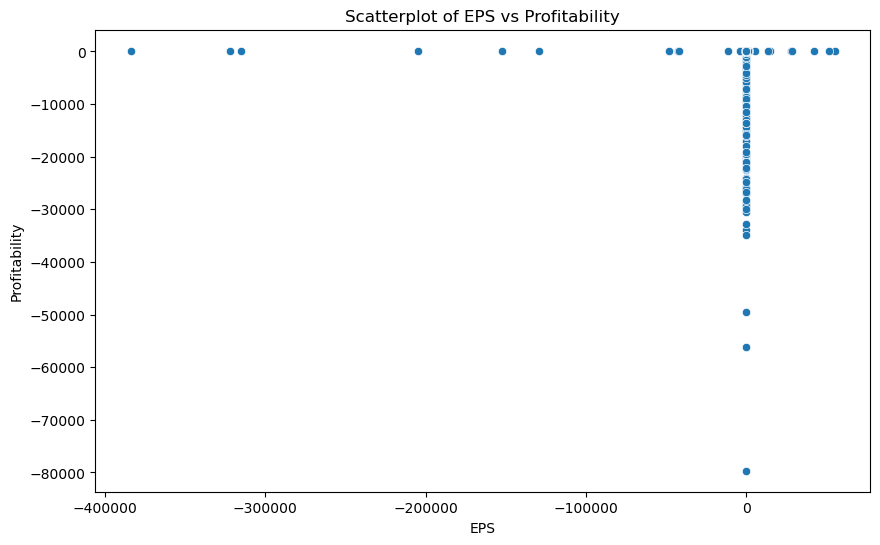

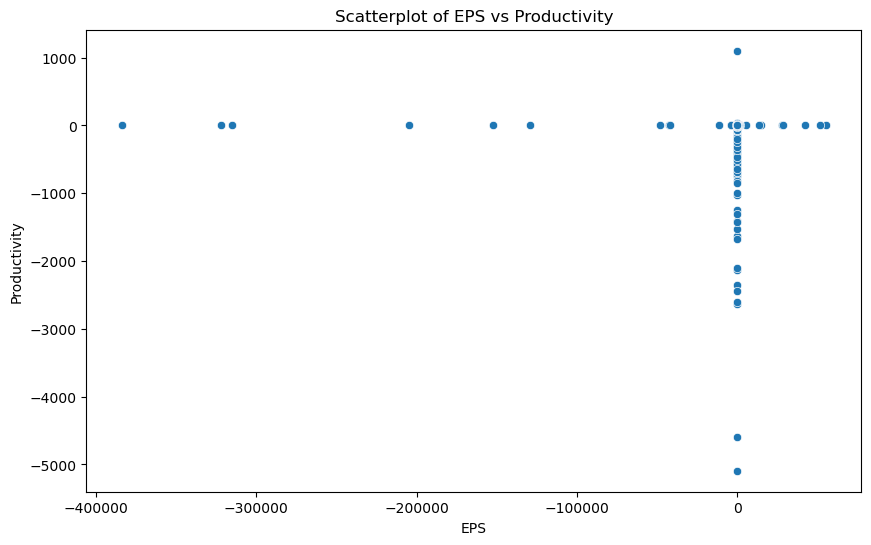

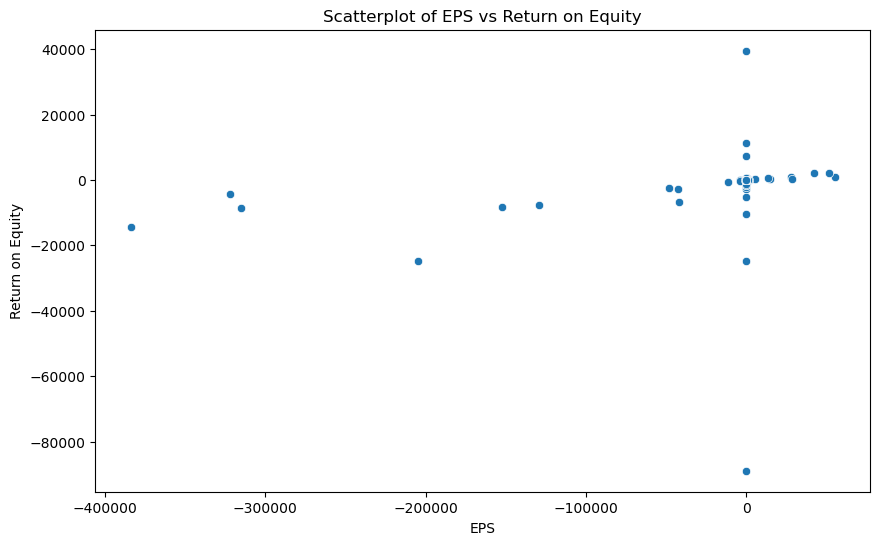

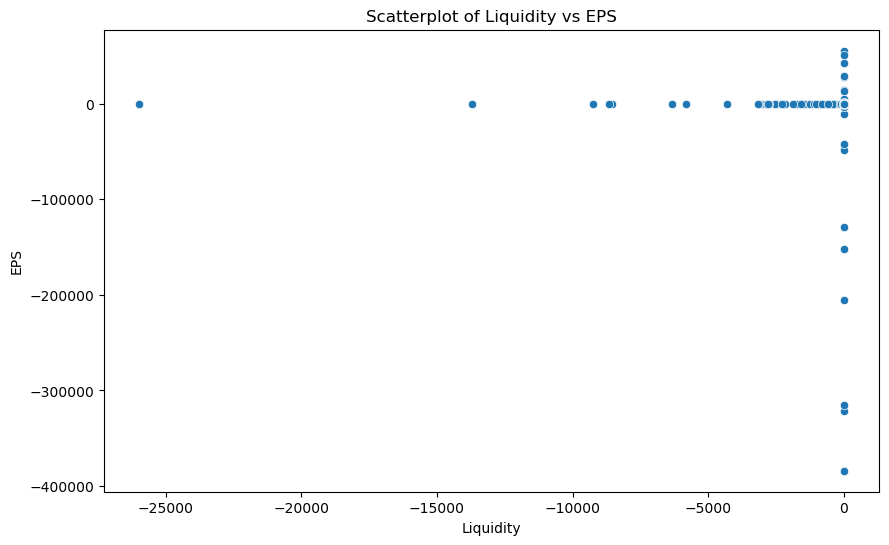

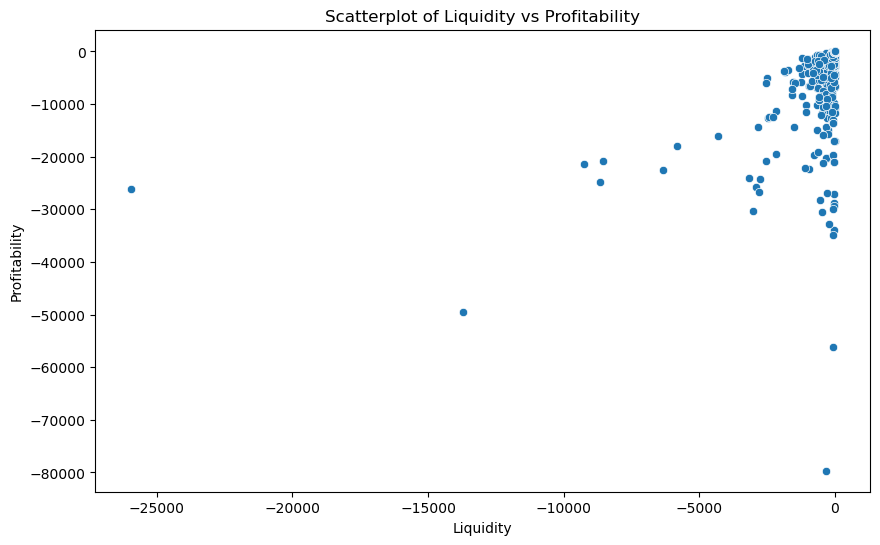

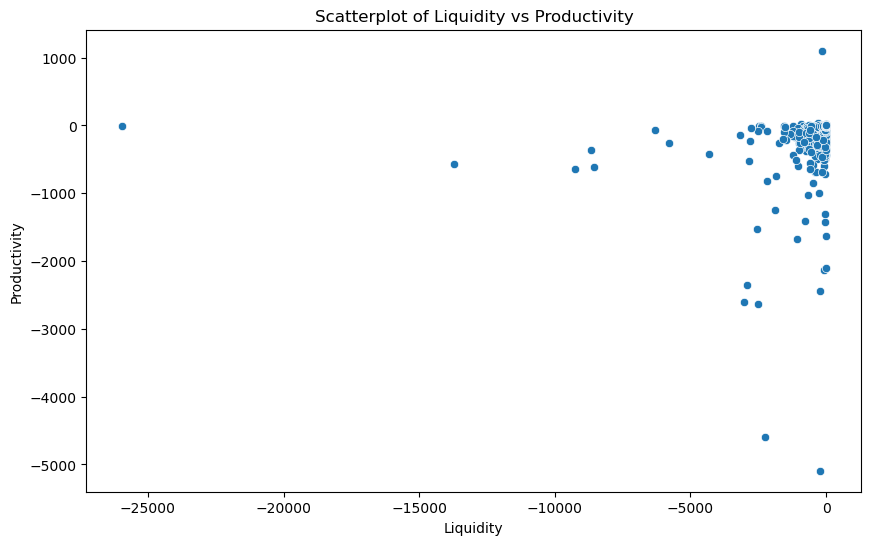

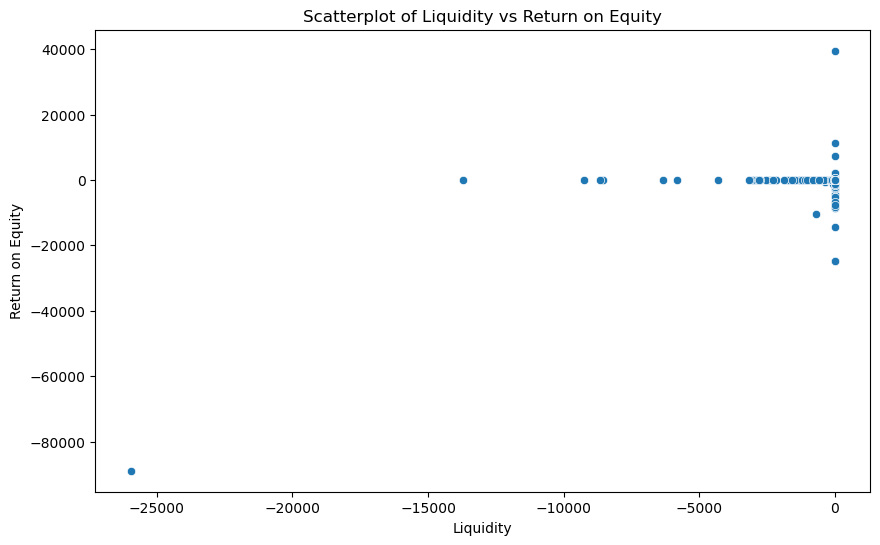

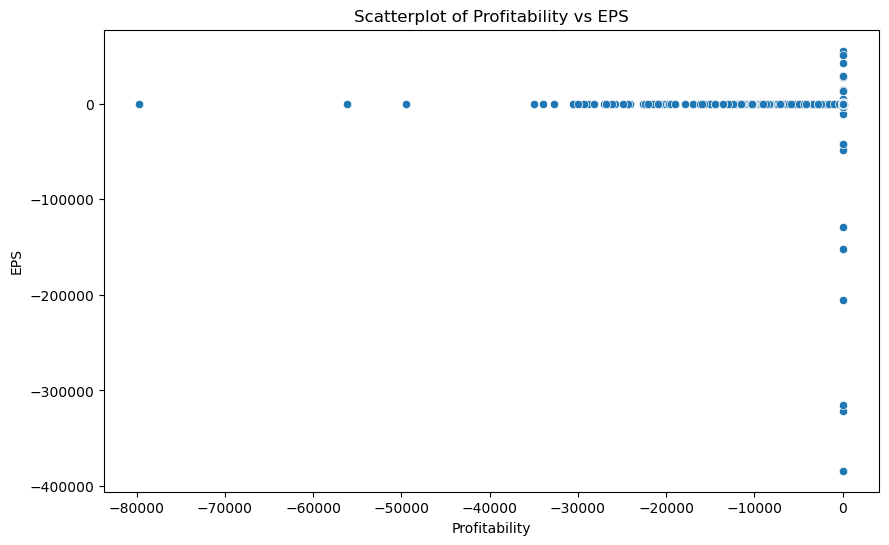

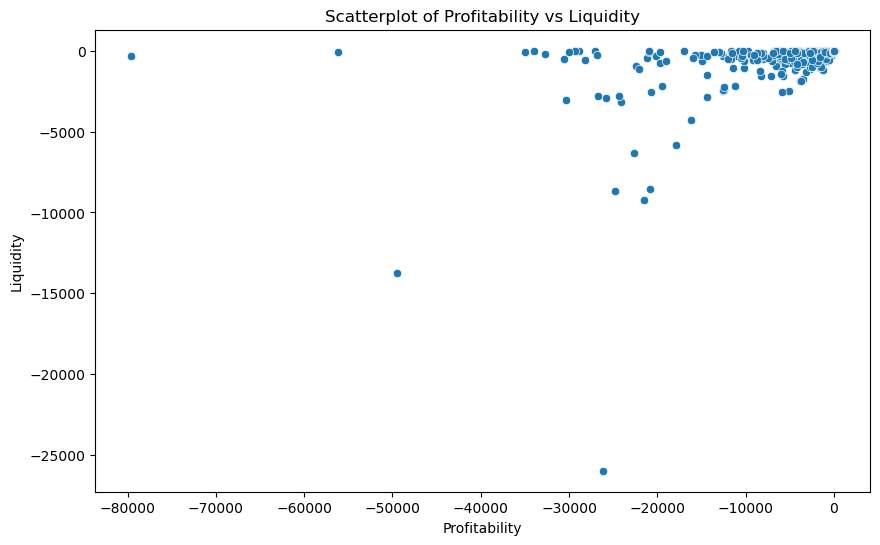

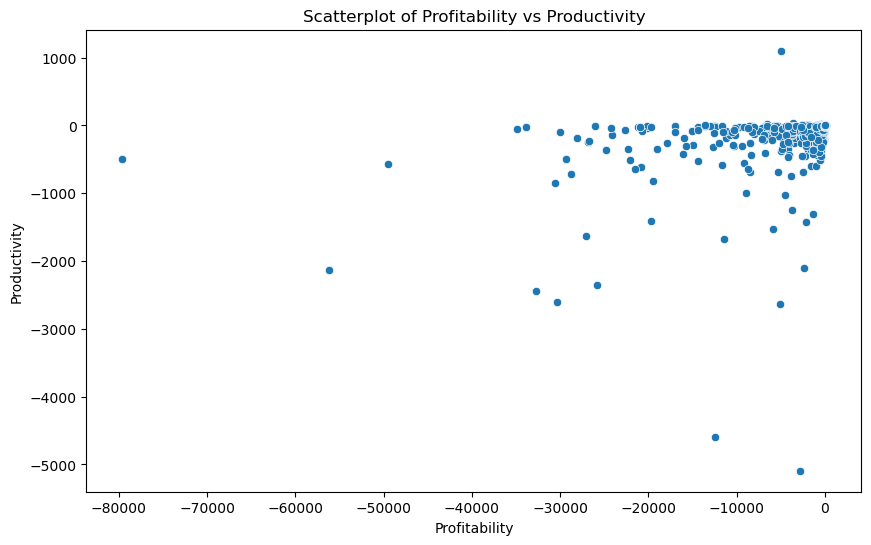

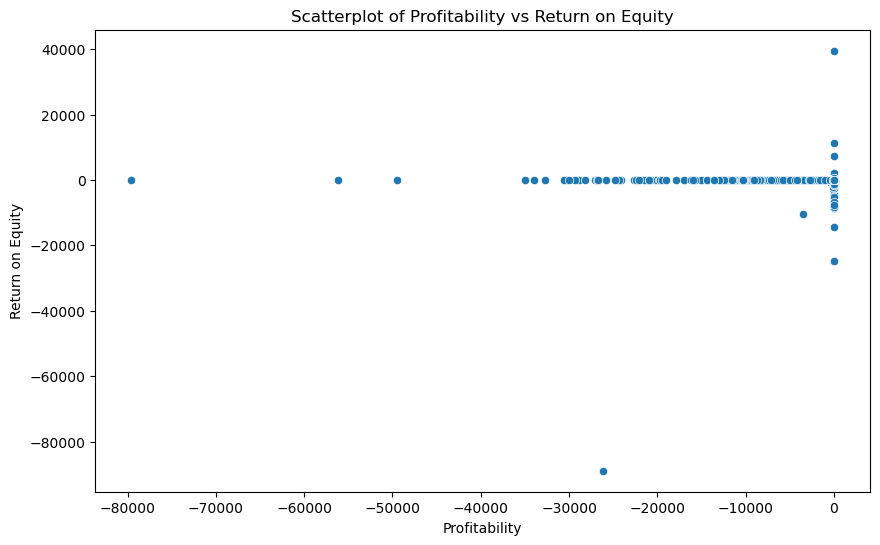

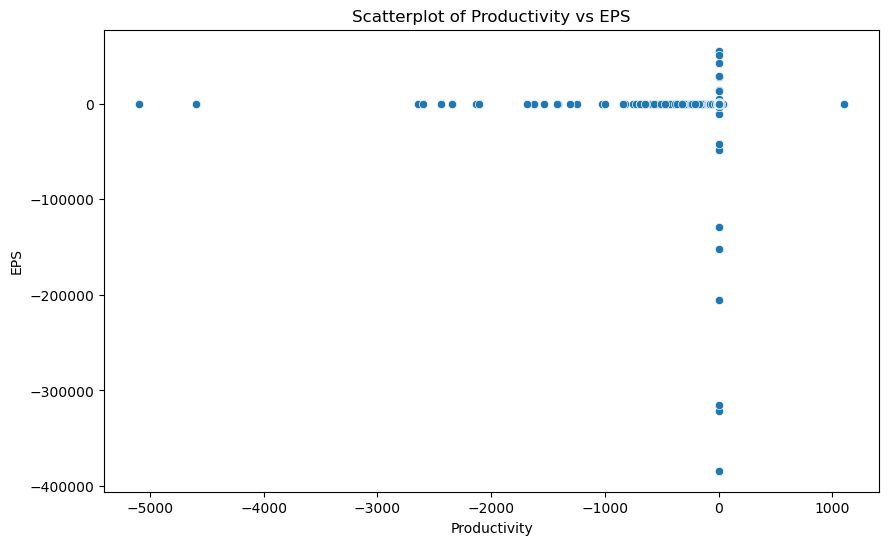

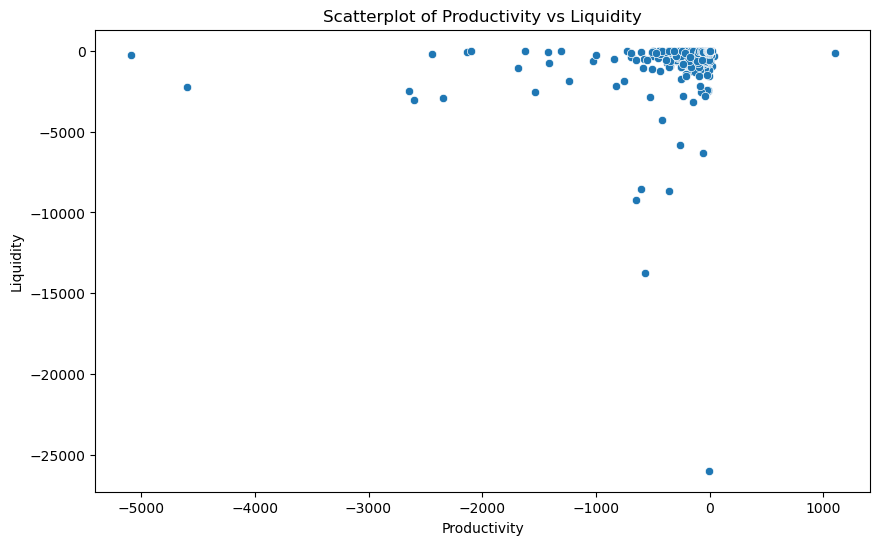

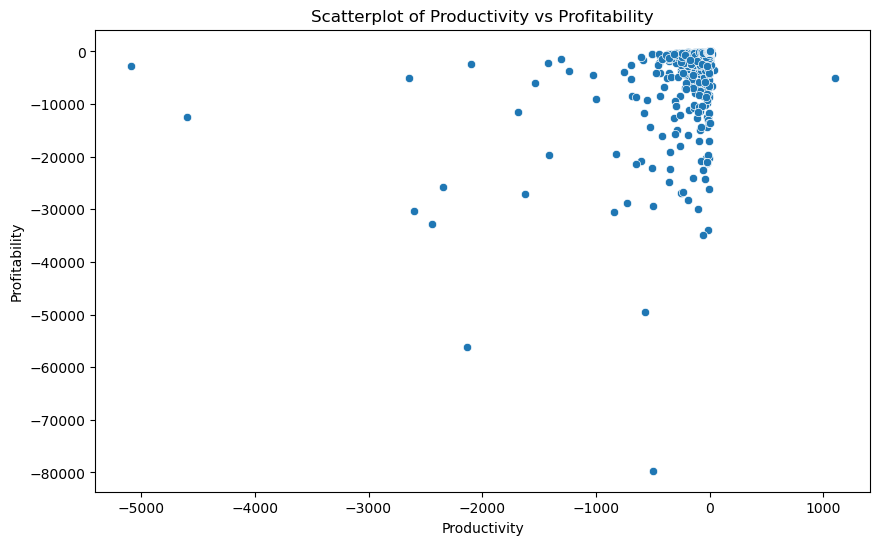

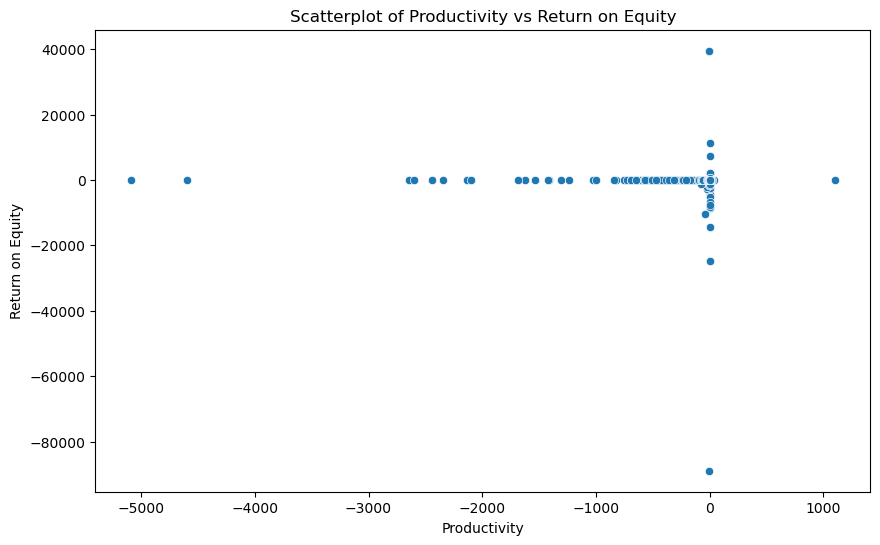

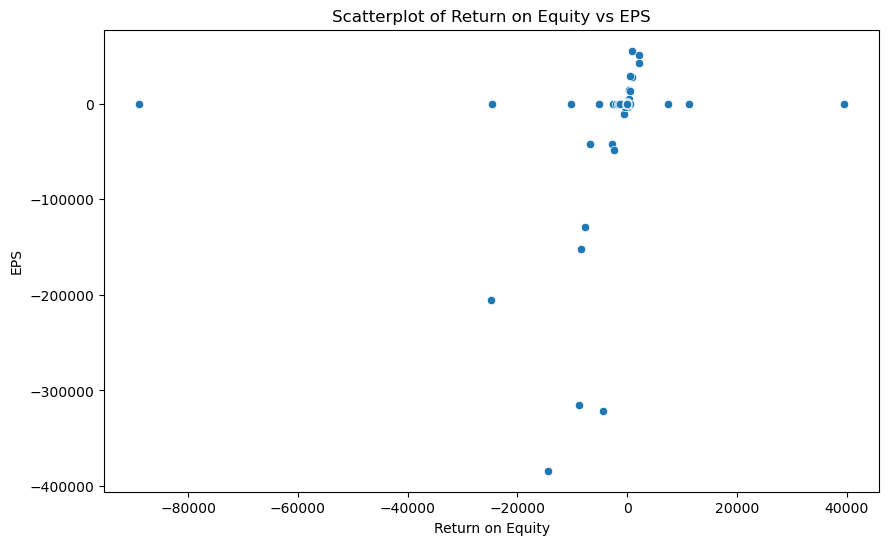

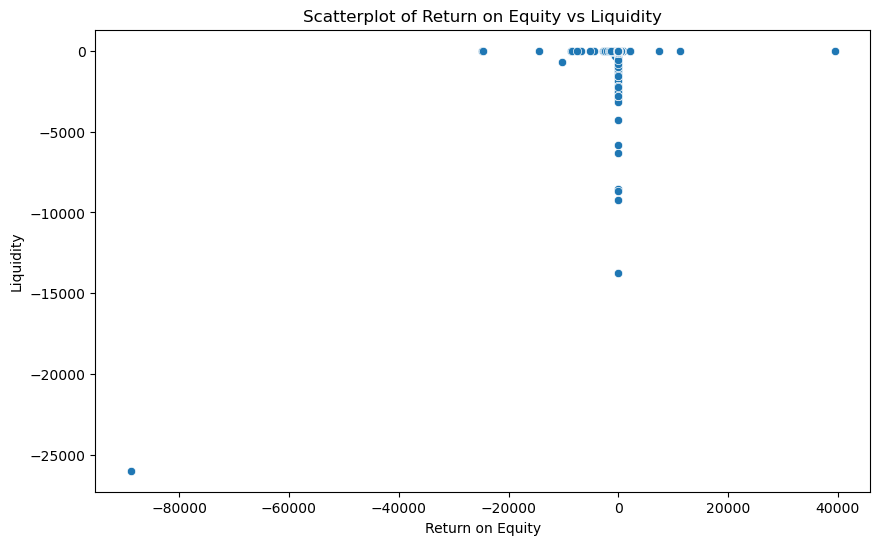

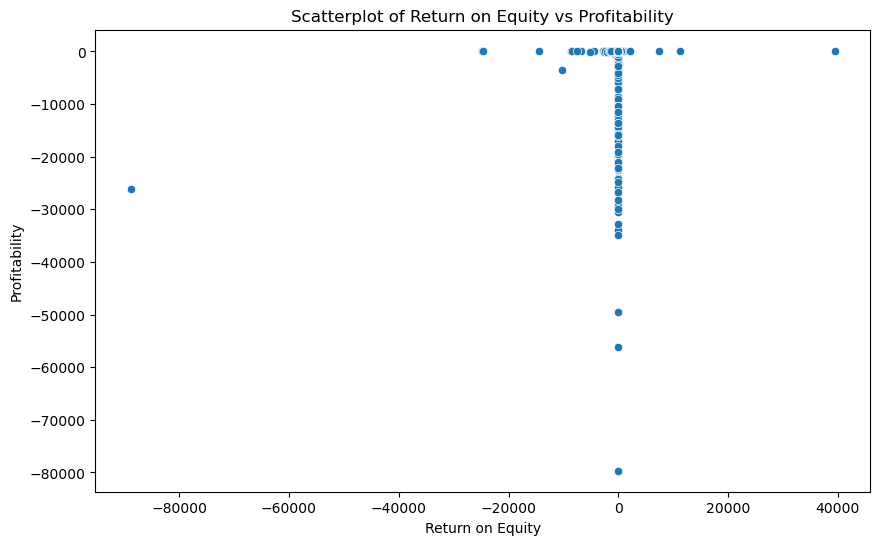

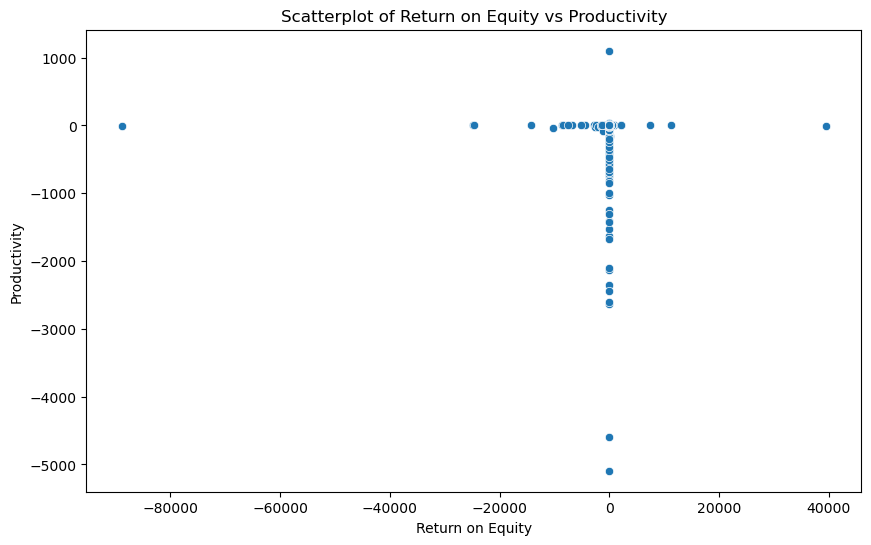

In [59]:
for col1 in Corr_Var:
    for col2 in Corr_Var:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'Scatterplot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

### SVM Model 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [28]:
X_feat = list(set(df.columns)-{'BK'})
y_feat = ['BK']

In [29]:
X = df[X_feat]
y = df[y_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

(array([73803.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   441.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

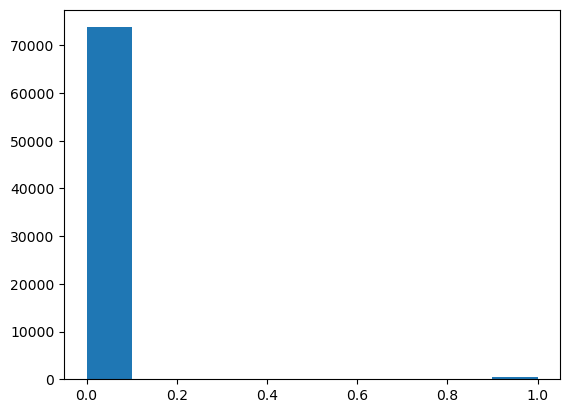

In [30]:
plt.hist(y_train)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = SVC(class_weight="balanced") 

#class_weight="balanced" will assign equal weights to both classes during the training phase

model.fit(X_train_scaled,y_train)

SVC(class_weight='balanced')

In [34]:
predictions = model.predict(X_test_scaled)

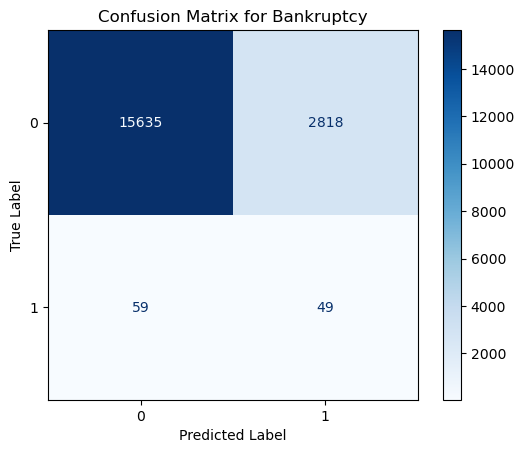

In [35]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Bankruptcy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     18453
           1       0.02      0.45      0.03       108

    accuracy                           0.84     18561
   macro avg       0.51      0.65      0.47     18561
weighted avg       0.99      0.84      0.91     18561



In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
auc = roc_auc_score(y_test, predictions)

print(auc)

0.6504957038000446


#### Hyperparameter Tuning for SVC Model

In [46]:
params = {
    'C': 0.01,
    'gamma': 10,
    'kernel': 'rbf',
    'class_weight': 'balanced'
}

model = SVC(C=params['C'], gamma=params['gamma'], kernel=params['kernel'], class_weight=params['class_weight'])


In [47]:
model.fit(X_train_scaled, y_train)

SVC(C=0.01, class_weight='balanced', gamma=10)

In [48]:
predictions = model.predict(X_test_scaled)

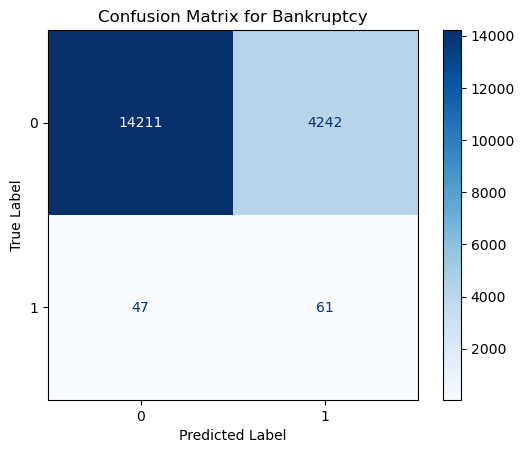

In [52]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Bankruptcy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     18453
           1       0.01      0.56      0.03       108

    accuracy                           0.77     18561
   macro avg       0.51      0.67      0.45     18561
weighted avg       0.99      0.77      0.86     18561



In [51]:
auc = roc_auc_score(y_test, predictions)

print(auc)

0.6674667473521319


### Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [66]:
oversample = SMOTE()

# SMOTE creates synthetic data points for the minority class

X_train_scaled, y_train = oversample.fit_resample(X_train_scaled, y_train)

(array([73803.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 73803.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

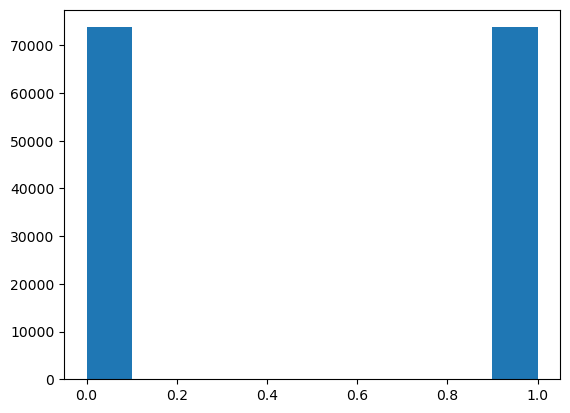

In [67]:
plt.hist(y_train)

In [68]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [69]:
y_pred = model.predict(X_test_scaled)

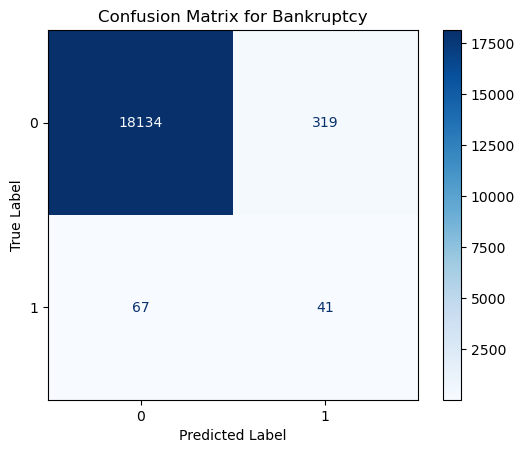

In [70]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Bankruptcy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18453
           1       0.11      0.38      0.18       108

    accuracy                           0.98     18561
   macro avg       0.56      0.68      0.58     18561
weighted avg       0.99      0.98      0.98     18561



In [72]:
auc = roc_auc_score(y_test, y_pred)

print(auc)

0.6811712338252739


#### Hyperparameter tuning for random forest model

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
base_model = RandomForestClassifier()
criterion = ['gini', 'entropy']
max_depth = [2, 5, 10, 20]
max_leaf_nodes = [2, 5, 10, 20]
n_estimators = [10, 25, 50, 100]
params = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes, 'n_estimators':n_estimators}
grid = GridSearchCV(base_model, params, cv=3,verbose=2)

In [78]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=25; total time=   1.1s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=25; total time=   1.1s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=25; total time=   1.2s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=50; total time=   2.6s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=50; total time=   2.7s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=50; total time=   2.7s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100; total time=   5.6s
[CV] END criteri

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             verbose=2)

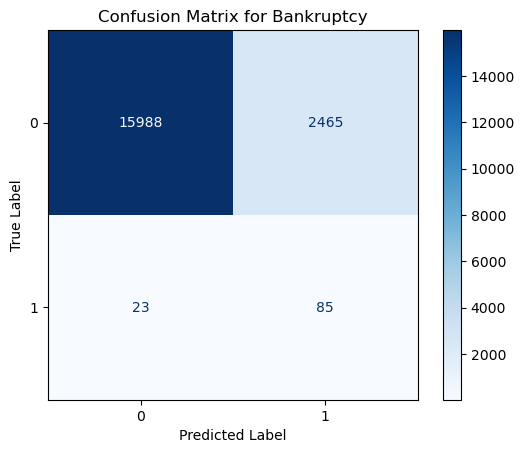

In [80]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Bankruptcy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
y_pred = grid.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     18453
           1       0.03      0.79      0.06       108

    accuracy                           0.87     18561
   macro avg       0.52      0.83      0.50     18561
weighted avg       0.99      0.87      0.92     18561



In [81]:
auc = roc_auc_score(y_test, y_pred)

print(auc)

0.8267272108720655
